In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# %matplotlib inline
mpl.style.use("ggplot")


In [37]:
car = pd.read_csv("./car_resale_prices.csv")
car.head()


,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [38]:
print("Shape: ", car.shape)
car.info()


Shape:  (17446, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 

In [39]:
cars_new = pd.DataFrame()
# car[
#     [
#         "full_name",
#         "resale_price",
#         "registered_year",
#         "engine_capacity",
#         "transmission_type",
#         "kms_driven",
#         "owner_type",
#         "fuel_type",
#         "max_power",
#         "seats",
#         "mileage",
#         "body_type",
#     ]
# ]


## Cleaning data
### Removing year from full_name

In [40]:
print(car["full_name"].isnull().sum())

cars_new["full_name"] = car["full_name"].map(lambda x: x[5:])

cars_new["full_name"]


0


0                  Maruti Baleno 1.2 Alpha
1                            Tata Hexa XTA
2                   Maruti Swift Dzire VXI
3                   Maruti Swift Dzire VXI
4                    Hyundai i10 Magna 1.1
                       ...                
17441               Honda Amaze VX i-Vtech
17442              Toyota Camry 2.5 Hybrid
17443           Toyota Corolla Altis GL MT
17444    Hyundai Creta 1.6 CRDi AT SX Plus
17445               Maruti Swift Dzire VDi
Name: full_name, Length: 17446, dtype: object

In [41]:
import re

print(car["resale_price"].isnull().sum())

cars_new["resale_price"] = car["resale_price"].map(
    lambda x: float(re.search(r"\d+(\.\d+)?", x).group(0)) * 100000
)

cars_new["resale_price"]


0


0         545000.0
1        1000000.0
2         450000.0
3         450000.0
4         160000.0
           ...    
17441     325000.0
17442    2075000.0
17443     835000.0
17444    1395000.0
17445     650000.0
Name: resale_price, Length: 17446, dtype: float64

In [42]:
print(car["registered_year"].isnull().sum())

cars_new["registered_year"] = car["full_name"].map(
    lambda x: int(re.search(r"\d{4}", str(x)).group(0))
)

cars_new["registered_year"]


69


0        2017
1        2018
2        2015
3        2015
4        2009
         ... 
17441    2013
17442    2016
17443    2016
17444    2019
17445    2017
Name: registered_year, Length: 17446, dtype: int64

In [43]:
# car["engine_capacity"].info()
# check for null values
print(car["engine_capacity"].isnull().sum())

cars_new["engine_capacity"] = car["engine_capacity"].map(
    lambda x: pd.NA
    if re.search(r"\d+", str(x)) is None
    else int(re.search(r"\d+", str(x)).group(0))
)

cars_new["engine_capacity"]


14


0        1197
1        2179
2        1197
3        1197
4        1086
         ... 
17441    1198
17442    2494
17443    1798
17444    1582
17445    1248
Name: engine_capacity, Length: 17446, dtype: object

In [44]:
print(car["transmission_type"].isnull().sum())

cars_new["transmission_type"] = car["transmission_type"]

cars_new["transmission_type"]


0


0           Manual
1        Automatic
2           Manual
3           Manual
4           Manual
           ...    
17441       Manual
17442    Automatic
17443       Manual
17444    Automatic
17445       Manual
Name: transmission_type, Length: 17446, dtype: object

In [45]:
print(car["kms_driven"].isnull().sum())

cars_new["kms_driven"] = car["kms_driven"].map(
    lambda x: pd.NA
    if re.search(r"\d+", str(x).replace(",", "")) is None
    else int(re.search(r"\d+", str(x).replace(",", "")).group(0))
)

cars_new["kms_driven"]


3


0        40000
1        70000
2        70000
3        70000
4        80000
         ...  
17441    89000
17442    68000
17443    81000
17444    20000
17445    32000
Name: kms_driven, Length: 17446, dtype: object

In [46]:
print(car["owner_type"].isnull().sum())

cars_new["owner_type"] = car["owner_type"]

cars_new["owner_type"]


45


0         First Owner
1         First Owner
2        Second Owner
3        Second Owner
4         First Owner
             ...     
17441    Second Owner
17442     First Owner
17443     First Owner
17444     First Owner
17445     First Owner
Name: owner_type, Length: 17446, dtype: object

In [47]:
print(car["fuel_type"].isnull().sum())

cars_new["fuel_type"] = car["fuel_type"]

cars_new["fuel_type"]


0


0        Petrol
1        Diesel
2        Petrol
3        Petrol
4        Petrol
          ...  
17441    Petrol
17442    Petrol
17443    Petrol
17444    Diesel
17445    Diesel
Name: fuel_type, Length: 17446, dtype: object

In [48]:
print(car["seats"].isnull().sum())

cars_new["seats"] = car["seats"].map(
    lambda x: pd.NA
    if re.search(r"\d+", str(x)) is None
    else int(re.search(r"\d+", str(x)).group(0))
)

cars_new["seats"]


10


0        5
1        7
2        5
3        5
4        5
        ..
17441    5
17442    5
17443    5
17444    5
17445    5
Name: seats, Length: 17446, dtype: object

In [49]:
print(car["mileage"].isnull().sum())

cars_new["mileage"] = car["mileage"].map(
    lambda x: pd.NA
    if re.search(r"\d+(\.\d+)?", str(x)) is None
    else float(re.search(r"\d+(\.\d+)?", str(x)).group(0))
)

cars_new["mileage"]


508


0         21.4
1         17.6
2        20.85
3        20.85
4        19.81
         ...  
17441     18.0
17442    19.16
17443    14.28
17444    17.01
17445     19.3
Name: mileage, Length: 17446, dtype: object

In [50]:
print(car["body_type"].isnull().sum())
cars_new["body_type"] = car["body_type"]

cars_new["body_type"].unique()


0


array(['Hatchback', 'MUV', 'Sedan', 'Minivans', 'SUV', 'Toyota', 'Coupe',
       'Chevrolet', 'Mercedes-Benz', 'Audi', 'Maruti', 'Pickup',
       'Porsche', 'Tata', 'Mahindra', 'Volvo', 'Jaguar', 'BMW', 'Cars',
       'Datsun', 'Hyundai', 'Honda', 'Convertibles', 'Wagon', 'Skoda',
       'Isuzu'], dtype=object)

In [51]:
print(car["full_name"].isnull().sum())

cars_new["brand"] = cars_new["full_name"].map(
    lambda x: pd.NA if str(x).split(" ")[0] is None else str(x).split(" ")[0]
)

cars_new["brand"].unique()


0


array(['Maruti', 'Tata', 'Hyundai', 'Honda', 'Toyota', 'Kia', 'Ford',
       'Mitsubishi', 'Mahindra', 'Audi', 'Volkswagen', 'Skoda', 'MG',
       'Renault', 'Nissan', 'Chevrolet', 'Datsun', 'Jeep', 'BMW',
       'Mercedes-Benz', 'Fiat', 'Land', 'Lexus', 'Jaguar', 'Volvo',
       'Isuzu', 'Porsche', 'Mini', 'Citroen', 'Force', 'Hindustan',
       'OpelCorsa', 'Daewoo', 'Bentley'], dtype=object)

In [52]:
cars_new.dropna(how="any", inplace=True)

cleaned_cars = pd.DataFrame()

cleaned_cars["full_name"] = cars_new["full_name"]
cleaned_cars["brand"] = cars_new["brand"]
cleaned_cars["resale_price"] = cars_new["resale_price"]
cleaned_cars["registered_year"] = cars_new["registered_year"]
cleaned_cars["engine_capacity"] = cars_new["engine_capacity"].astype(float)
cleaned_cars["kms_driven"] = cars_new["kms_driven"].astype(int)
cleaned_cars["owner_type"] = cars_new["owner_type"]
cleaned_cars["transmission_type"] = cars_new["transmission_type"]
cleaned_cars["fuel_type"] = cars_new["fuel_type"]
cleaned_cars["mileage"] = cars_new["mileage"].astype(float)
cleaned_cars["body_type"] = cars_new["body_type"]
cleaned_cars["seats"] = cars_new["seats"].astype(int)

cleaned_cars = cleaned_cars.reset_index(drop=True)

cleaned_cars.info()

# export to csv
cleaned_cars.to_csv("./cleaned_cars.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          16880 non-null  object 
 1   brand              16880 non-null  object 
 2   resale_price       16880 non-null  float64
 3   registered_year    16880 non-null  int64  
 4   engine_capacity    16880 non-null  float64
 5   kms_driven         16880 non-null  int64  
 6   owner_type         16880 non-null  object 
 7   transmission_type  16880 non-null  object 
 8   fuel_type          16880 non-null  object 
 9   mileage            16880 non-null  float64
 10  body_type          16880 non-null  object 
 11  seats              16880 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 1.5+ MB


In [53]:
cleaned_cars.describe(include="all")


,full_name,brand,resale_price,registered_year,engine_capacity,kms_driven,owner_type,transmission_type,fuel_type,mileage,body_type,seats
count,16880,16880,1.688000e+04,16880.000000,16880.000000,1.688000e+04,16880,16880,16880,16880.000000,16880,16880.000000
unique,3197,34,NaN,NaN,NaN,NaN,5,2,5,NaN,25,NaN
top,Maruti Swift VXI,Maruti,NaN,NaN,NaN,NaN,First Owner,Manual,Petrol,NaN,Hatchback,NaN
freq,230,4791,NaN,NaN,NaN,NaN,11851,12277,11068,NaN,7242,NaN
mean,NaN,NaN,9.080702e+05,2016.235545,1419.378318,5.934513e+04,NaN,NaN,NaN,19.379589,NaN,5.205036
std,NaN,NaN,1.145647e+06,3.645119,465.852730,6.428737e+04,NaN,NaN,NaN,4.247416,NaN,0.660398
min,NaN,NaN,1.000000e+05,1985.000000,0.000000,3.000000e+02,NaN,NaN,NaN,6.700000,NaN,2.000000
25%,NaN,NaN,3.847500e+05,2014.000000,1197.000000,3.309250e+04,NaN,NaN,NaN,17.000000,NaN,5.000000
50%,NaN,NaN,5.850000e+05,2017.000000,1248.000000,5.549600e+04,NaN,NaN,NaN,18.900000,NaN,5.000000
75%,NaN,NaN,9.000000e+05,2019.000000,1498.000000,8.000000e+04,NaN,NaN,NaN,21.630000,NaN,5.000000


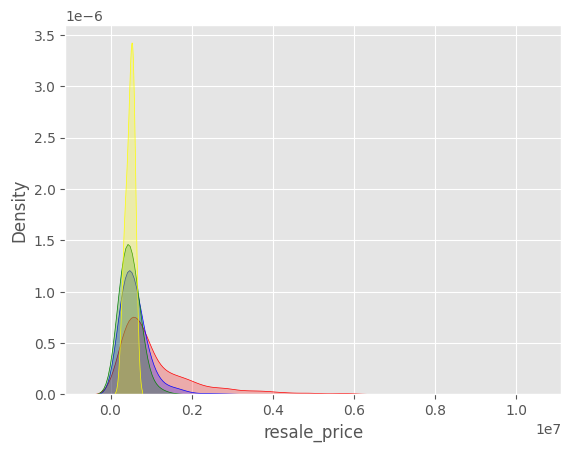

In [54]:
import seaborn as sns

label = ["Diesel", "Petrol", "CNG", "Electric"]
col = ["red", "blue", "green", "yellow"]

for i, j in zip(label, col):
    sns.kdeplot(
        cleaned_cars.loc[(cleaned_cars["fuel_type"] == i), "resale_price"],
        color=j,
        fill=True,
        label=i,
        legend=True,
    )


/tmp/ipykernel_39439/3416668975.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


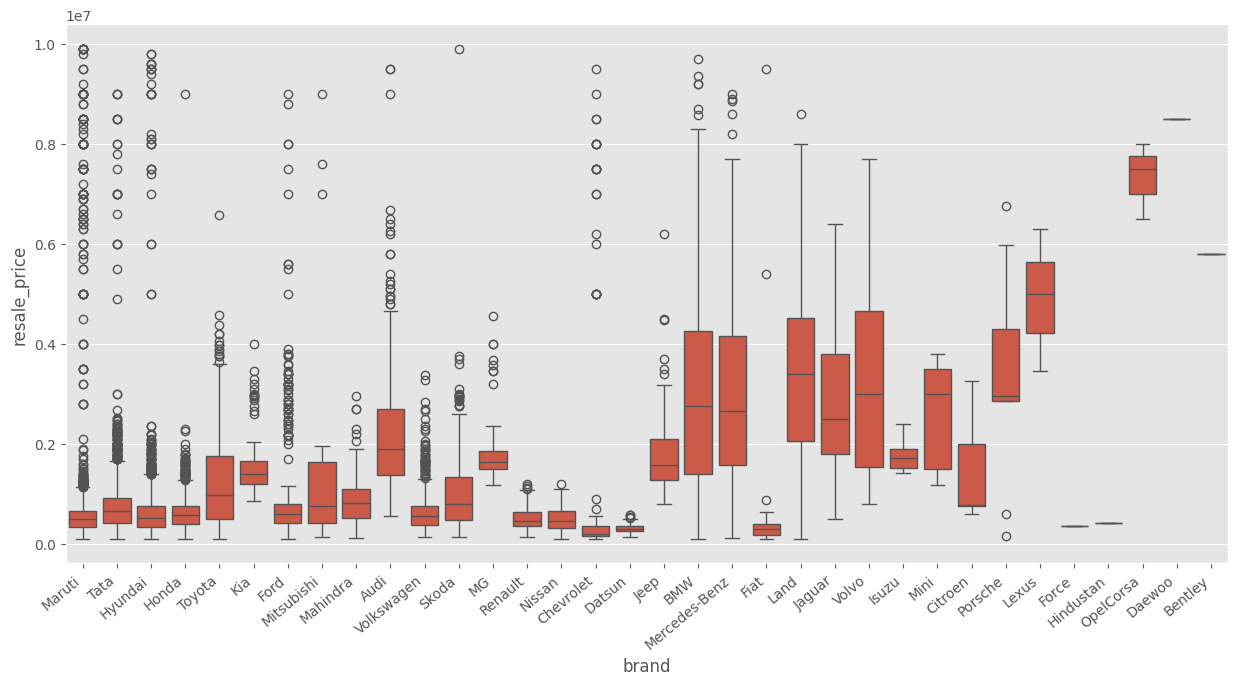

In [55]:
plt.subplots(figsize=(15, 7))
# change lin color to blue
ax = sns.boxplot(x="brand", y="resale_price", data=cleaned_cars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()


/tmp/ipykernel_39439/2097481151.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


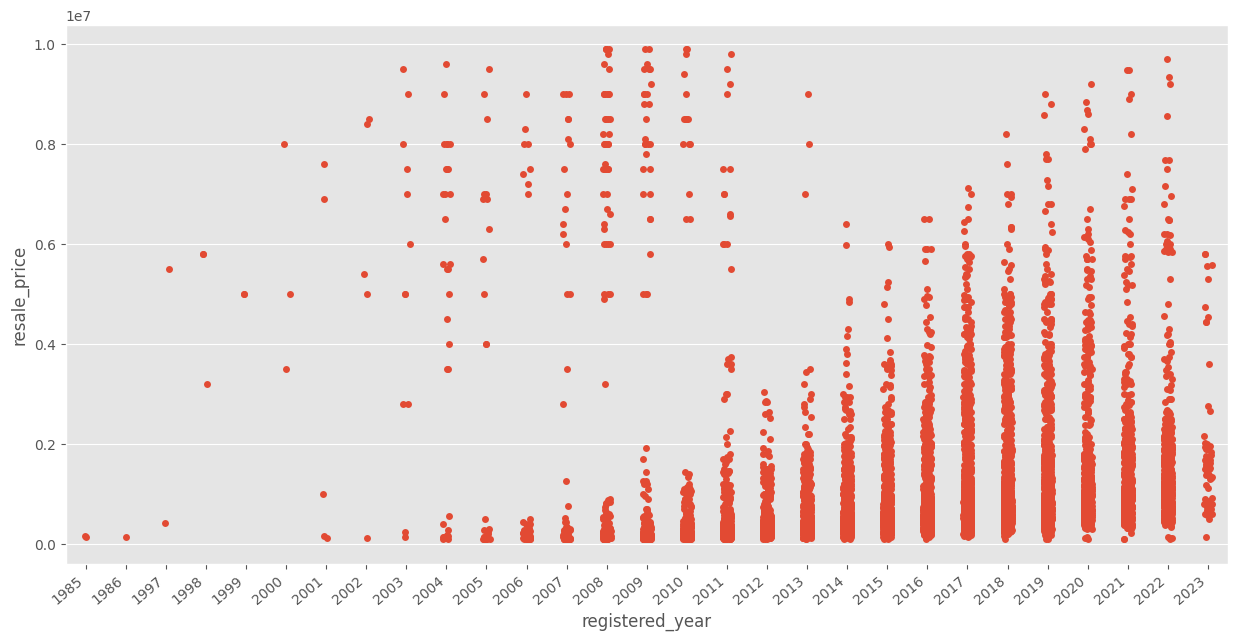

In [56]:
plt.subplots(figsize=(15, 7))
ax = sns.stripplot(x="registered_year", y="resale_price", data=cleaned_cars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()


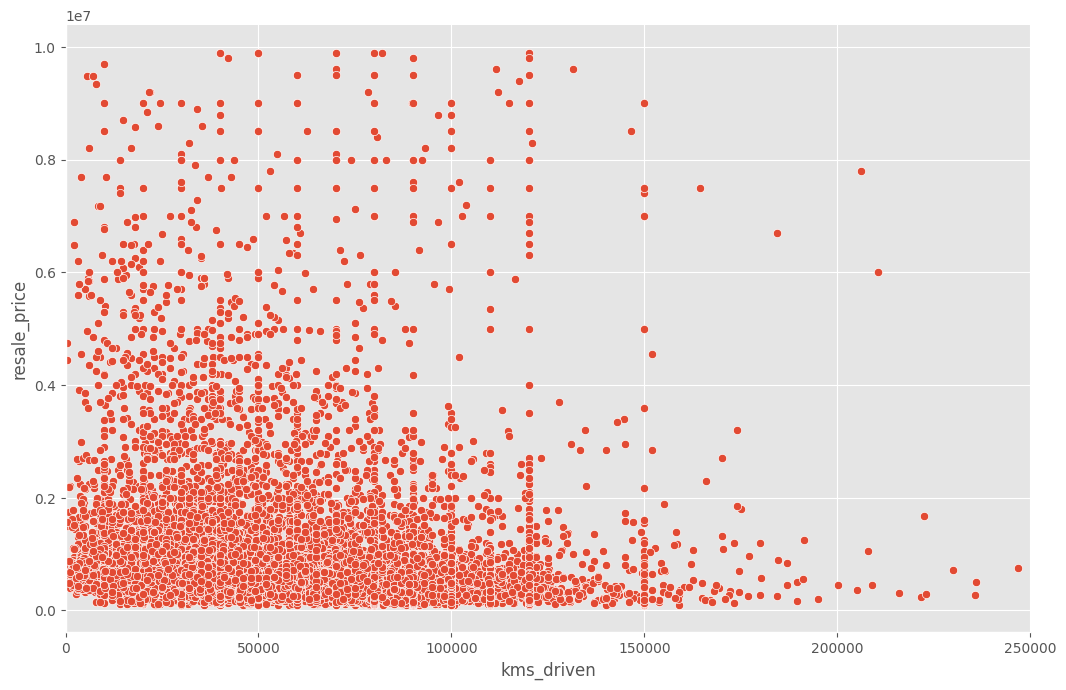

In [57]:
plot = sns.relplot(
    x="kms_driven", y="resale_price", data=cleaned_cars, height=7, aspect=1.5
)

plot.set(xlim=(0, 250000))


/tmp/ipykernel_39439/694173227.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


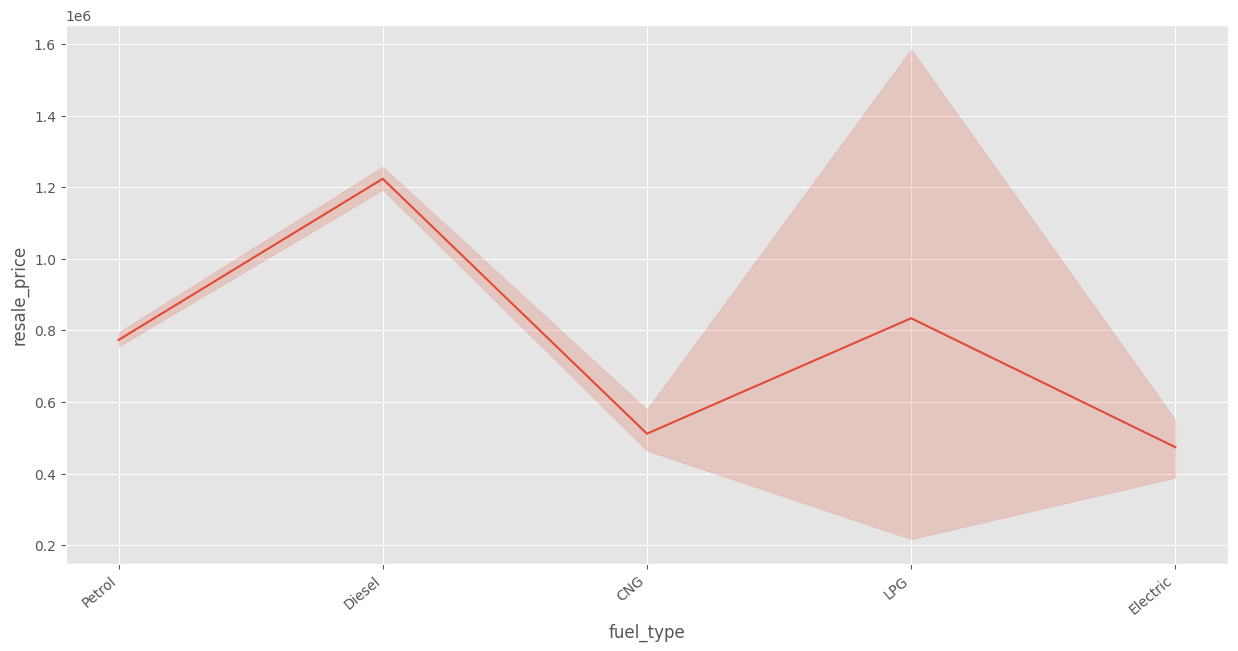

In [58]:
plt.subplots(figsize=(15, 7))
# change lin color to blue
ax = sns.lineplot(x="fuel_type", y="resale_price", data=cleaned_cars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()


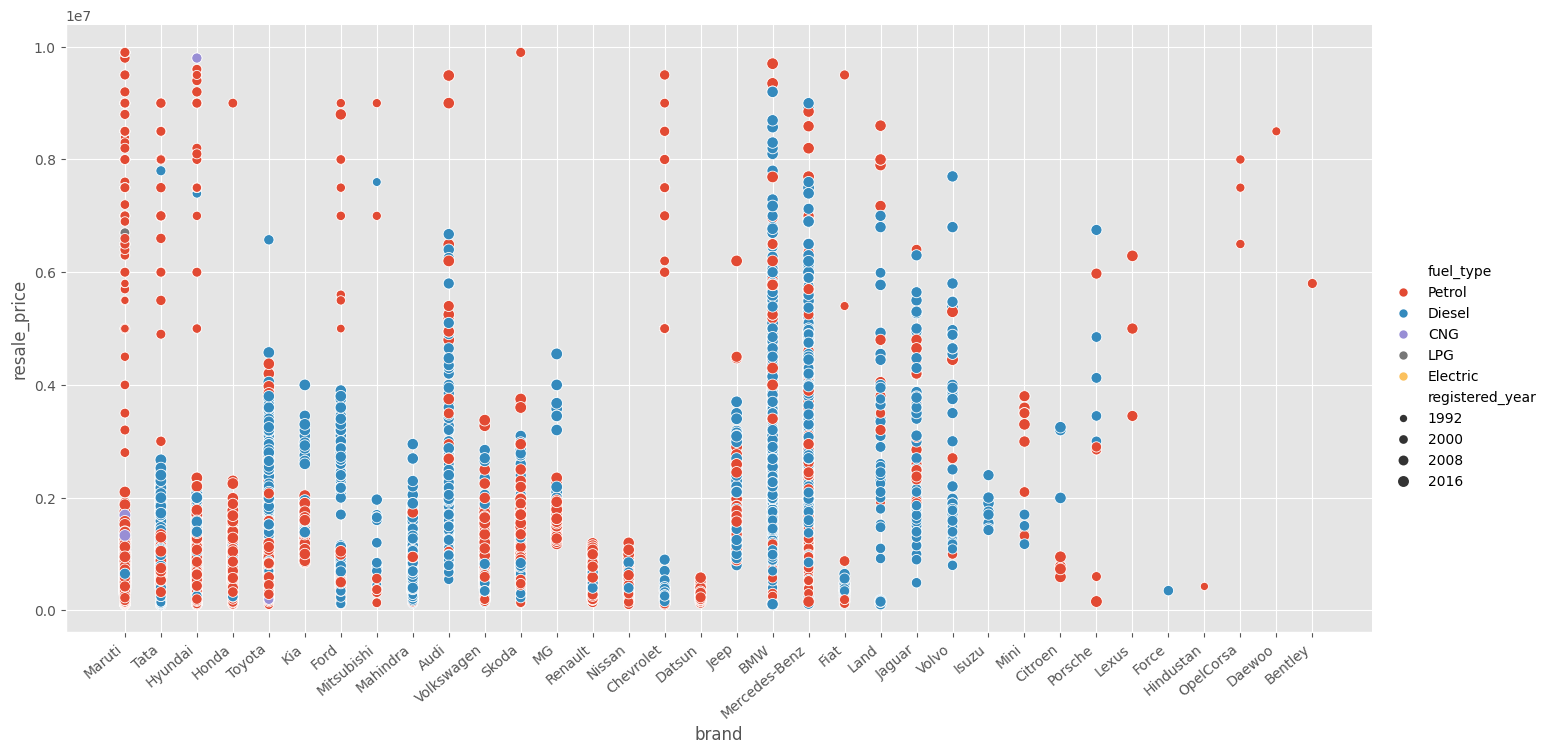

In [59]:
ax = sns.relplot(
    x="brand",
    y="resale_price",
    data=cleaned_cars,
    hue="fuel_type",
    size="registered_year",
    height=7,
    aspect=2,
)
ax.set_xticklabels(rotation=40, ha="right")


<Axes: >

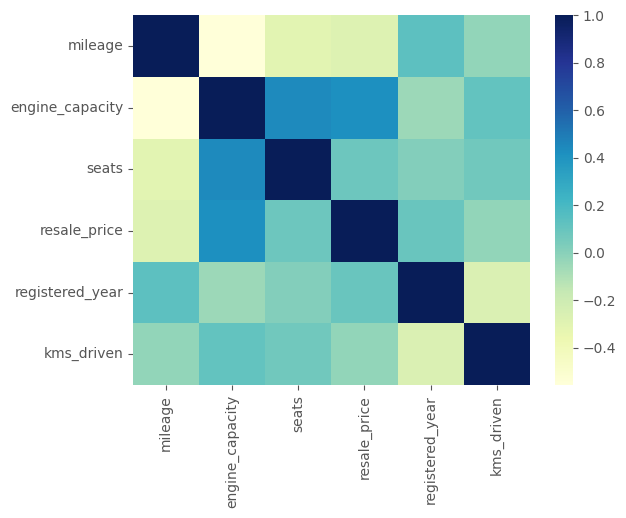

In [60]:
sns.heatmap(
    data=cleaned_cars[
        [
            "mileage",
            "engine_capacity",
            "seats",
            "resale_price",
            "registered_year",
            "kms_driven",
        ]
    ].corr(),
    cmap="YlGnBu",
    # square=True,
)


In [61]:
features_list = [
    # "full_name",
    # "brand",
    # "fuel_type",
    # "owner_type",
    # "body_type",
    # "transmission_type",
    "mileage",
    "seats",
    "engine_capacity",
    "kms_driven",
    "registered_year",
]

X = cleaned_cars[features_list]

others = [
    "full_name",
    "brand",
    "fuel_type",
    "owner_type",
    "body_type",
    "transmission_type",
]

for col in others:
    X[col] = pd.factorize(cleaned_cars[col])[0]

Y = cleaned_cars["resale_price"]

X


/tmp/ipykernel_39439/3261976047.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.factorize(cleaned_cars[col])[0]
/tmp/ipykernel_39439/3261976047.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.factorize(cleaned_cars[col])[0]
/tmp/ipykernel_39439/3261976047.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,mileage,seats,engine_capacity,kms_driven,registered_year,full_name,brand,fuel_type,owner_type,body_type,transmission_type
0,21.40,5,1197.0,40000,2017,0,0,0,0,0,0
1,17.60,7,2179.0,70000,2018,1,1,1,0,1,1
2,20.85,5,1197.0,70000,2015,2,0,0,1,2,0
3,20.85,5,1197.0,70000,2015,2,0,0,1,2,0
4,19.81,5,1086.0,80000,2009,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16875,18.00,5,1198.0,89000,2013,1211,3,0,1,2,0
16876,19.16,5,2494.0,68000,2016,806,4,0,0,2,1
16877,14.28,5,1798.0,81000,2016,1394,4,0,0,2,0
16878,17.01,5,1582.0,20000,2019,528,2,1,0,4,1


In [62]:
Y


0         545000.0
1        1000000.0
2         450000.0
3         450000.0
4         160000.0
           ...    
16875     325000.0
16876    2075000.0
16877     835000.0
16878    1395000.0
16879     650000.0
Name: resale_price, Length: 16880, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)


In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, Y_train)

rf_score = rf.score(X_test, Y_test)

print(rf_score)


0.5384616547717047


In [34]:
scores = []
for i in range(50):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.1, random_state=i
    )
    rf = RandomForestRegressor()
    rf.fit(X_train, Y_train)
    scores.append(rf.score(X_test, Y_test))


In [35]:
np.argmax(scores)
scores[np.argmax(scores)]


0.7660143567725998